#  Subhasis Sur , Shantanu Nayek , ISI KolKata

In [1]:
### library 
from ISLP import load_data 
import seaborn as sns
import pandas as pd
import sklearn.linear_model as skl
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df=load_data("Default")  ### loading of Defaulter data

# About the Data

In [3]:
df

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


In [4]:
df.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


 2 variables are categorical and other 2 are continous 

# Exploratory Data Analysis

<Axes: xlabel='balance'>

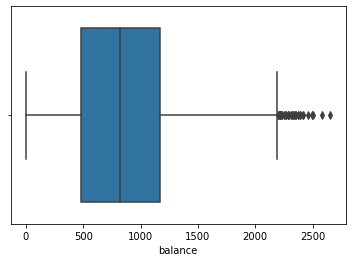

In [5]:
sns.boxplot(x="balance", data=df)  ## boxplot of balance

<Axes: xlabel='default', ylabel='balance'>

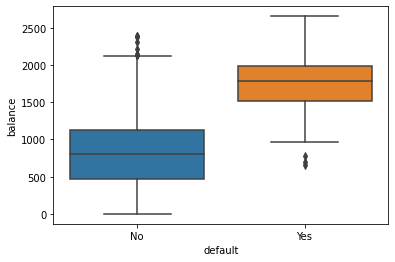

In [6]:
sns.boxplot(y="balance", x='default', data=df)

<Axes: xlabel='income'>

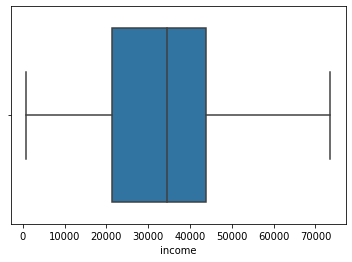

In [7]:
sns.boxplot(x="income", data=df)

<Axes: xlabel='default', ylabel='income'>

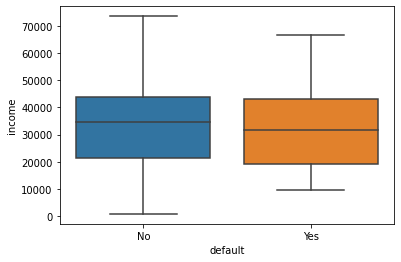

In [8]:
sns.boxplot(y="income", x='default', data=df)

Observation :

1> There are some outliers corresponding to the variable "balance". This variable ranges from 500 to 1200 (subject to the corresponding unit) in general. In the light of the given data, it seems that the defaulters have high balance in general.

2> There are no outliers corresponding to the variable "income". This variable ranges from 20000 to 43000 (subject to the corresponding unit) in general. In the light of the given data, it seems that the income status has no significant impact for the defaulters in general.

D:\Anaconda 1\lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


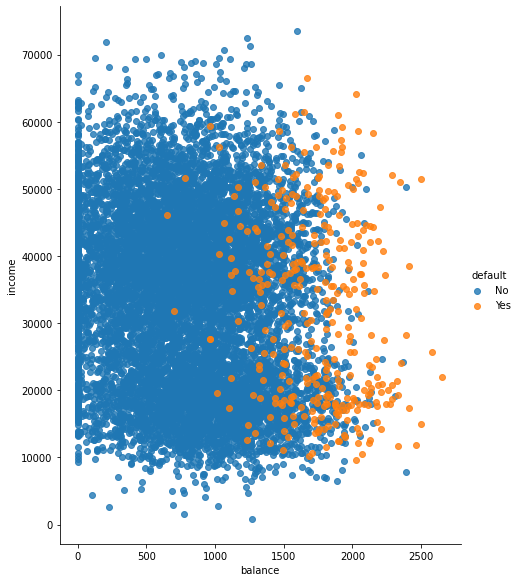

In [9]:
sns.lmplot(x="balance",y="income",data=df,hue="default",fit_reg=False,height=8,aspect=0.8)

It is very clear that balance for defaulters are higher than those of non-defaulter on average. This goes in line with the observation we made from the box plot. Moreover, there is no significant relationship between balance and income in light of the given data.

<Axes: xlabel='balance', ylabel='Count'>

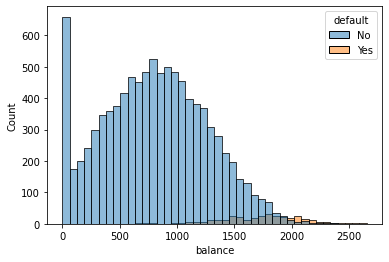

In [10]:
sns.histplot(x="balance",data=df,hue="default")   ##### histogram of balance

<Axes: xlabel='income', ylabel='Count'>

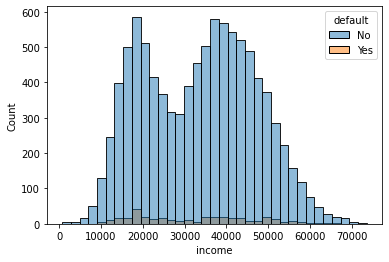

In [11]:
sns.histplot(x="income",data=df,hue="default")

Observation :

1> For the non-defaulters we observe that many of them have balance 0, also there are a no. of people who have high balance. 

2 > For the defaulters most of them have moderate or high balance.

3 > For the non-defaulters the income distribution seems to be bimodal. There is no significant difference in the income status which goes in line with the boxplot above.

4 > For the non-defaulters the balance has an inflation at 0. This seems to be the reason for the fact that the balance for non-defaulters are as a whole lower than those of defaulters which is the immediate consequence for boxplot of balance. 

In [12]:
pd.crosstab(index=df["default"],columns=df["student"])

student,No,Yes
default,,
No,6850,2817
Yes,206,127


Observation :

1 > Percentage of student defaulter is higher than the non-student defaulters.

2 > Our data has more non-defaulter individuals compared to defaulter individuals. So it seems that the data is imbalanced. 

# Logistic Regression

In [13]:
from sklearn.preprocessing import LabelEncoder   ### label encoding
lab=LabelEncoder()
df["student"]=lab.fit_transform(df["student"])

In [14]:
x=df.drop("default",axis=1)
y=df["default"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
logistic_model=skl.LogisticRegression(max_iter=500)
logistic_model.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [16]:
logistic_model.intercept_

array([-2.86828093])

In [17]:
logistic_model.feature_names_in_

array(['student', 'balance', 'income'], dtype=object)

In [18]:
logistic_model.coef_

array([[-3.79898798e+00,  4.06908863e-03, -1.37600242e-04]])

In [19]:
y_pred_logistic=logistic_model.predict(x_test)
from sklearn.metrics import confusion_matrix as cm
c_logistic=cm(y_pred_logistic,y_test)
c_logistic

array([[1915,   59],
       [  11,   15]], dtype=int64)

In [20]:
# misclassification error
(c_logistic[1][0]+c_logistic[0][1])/c_logistic.sum()

0.035

In [21]:
## f1 score
pre=(c_logistic[0][0])/(c_logistic[0][0]+c_logistic[0][1])
re=(c_logistic[0][0])/(c_logistic[0][0]+c_logistic[1][0])
2*pre*re/(pre+re)

0.982051282051282

On performing logistic regression, the misclassification error is 0.035 and F1 score is 0.98205.

# Decision Tree

In [22]:
from sklearn.tree import (DecisionTreeClassifier as DTC,export_graphviz) 
Classifier=DTC(random_state=0,min_samples_split=50,max_depth=4)
Classifier.fit(x_train,y_train)
fn=['student', 'balance', 'income']
cn=["NO","YES"]

In [23]:
export_graphviz(Classifier,out_file="credit.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)

In [24]:
y_pred_dec=Classifier.predict(x_test)
c_dec=cm(y_pred_dec,y_test)
c_dec

array([[1918,   56],
       [   8,   18]], dtype=int64)

In [25]:
# misclassification error
(c_dec[1][0]+c_dec[0][1])/c_dec.sum()

0.032

In [26]:
## f1 score
pre=(c_dec[0][0])/(c_dec[0][0]+c_dec[0][1])
re=(c_dec[0][0])/(c_dec[0][0]+c_dec[1][0])
2*pre*re/(pre+re)

0.9835897435897435

On applying decision tree algorithm for classification, the misclassification error is 0.032 and F1 score is 0.983589. Since we had 10000 data points, in order to prevent overfitting we fixed minimum no. of samples per leaf to 50 and max depth of the tree to 4.

# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier as RC

In [28]:
Random_forest=RC(random_state=0,bootstrap=True,oob_score=True,max_features=2,max_depth=4,min_samples_leaf=50,max_samples=6000)
Random_forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, max_features=2, max_samples=6000,
                       min_samples_leaf=50, oob_score=True, random_state=0)

In [29]:
y_pred_rc=Random_forest.predict(x_test)

In [30]:
c_rf=cm(y_pred_rc,y_test)
c_rf

array([[1921,   51],
       [   5,   23]], dtype=int64)

In [31]:
# misclassification error
(c_rf[1][0]+c_rf[0][1])/c_rf.sum()

0.028

In [32]:
## f1 score
pre=(c_rf[0][0])/(c_rf[0][0]+c_rf[0][1])
re=(c_rf[0][0])/(c_rf[0][0]+c_rf[1][0])
2*pre*re/(pre+re)

0.9856336582863007

In [33]:
Random_forest.oob_score_

0.9735

On applying random forest algorithm for classification, the misclassification error is 0.028 and F1 score is 0.985633. 
In our training data we had 8000 data points, each time we obtained a bootstrapped dataset by choosing 6000 data points randomly with replacements. In each of the trees we had min samples per leaf 50 and max depth of the tree 4.

# Comparison

Misclassification error : Random forest < Decision tree < Logistic Regression

F1 score : Random forest > Decision tree > Logistic Regression

